# NAME:AAKASH SHYAMLAL GUPTA

# TASK NO 2:TITANIC PREDICTIONS 


 ## Importing Libraries


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings







## Loading Dataset

In [42]:
titanic=sns.load_dataset("titanic")

## Data Understanding

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [45]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic.shape

(891, 15)

In [47]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Data Cleaning

### Removing Unnecessary Columns

In [49]:
titanic.drop(['alive', 'who', 'adult_male', 'class', 'embark_town', 'deck', 'embarked'], axis=1,inplace=True)

In [50]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone'], dtype='object')

### Removing Duplicate Rows

In [51]:
titanic.duplicated().sum()

114

In [52]:
titanic.shape

(891, 8)

In [53]:
titanic.drop_duplicates(inplace=True)

In [54]:
titanic.duplicated().sum()

0

In [55]:
titanic.shape

(777, 8)

### Filling Null Values¶


In [56]:
titanic.isnull().any()

survived    False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare        False
alone       False
dtype: bool

In [57]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())


In [58]:
titanic.isnull().any()

survived    False
pclass      False
sex         False
age         False
sibsp       False
parch       False
fare        False
alone       False
dtype: bool

## Convert Categorical Variables 


In [59]:
titanic = pd.get_dummies(titanic, columns=['sex', 'alone'])

## Data Visualizing

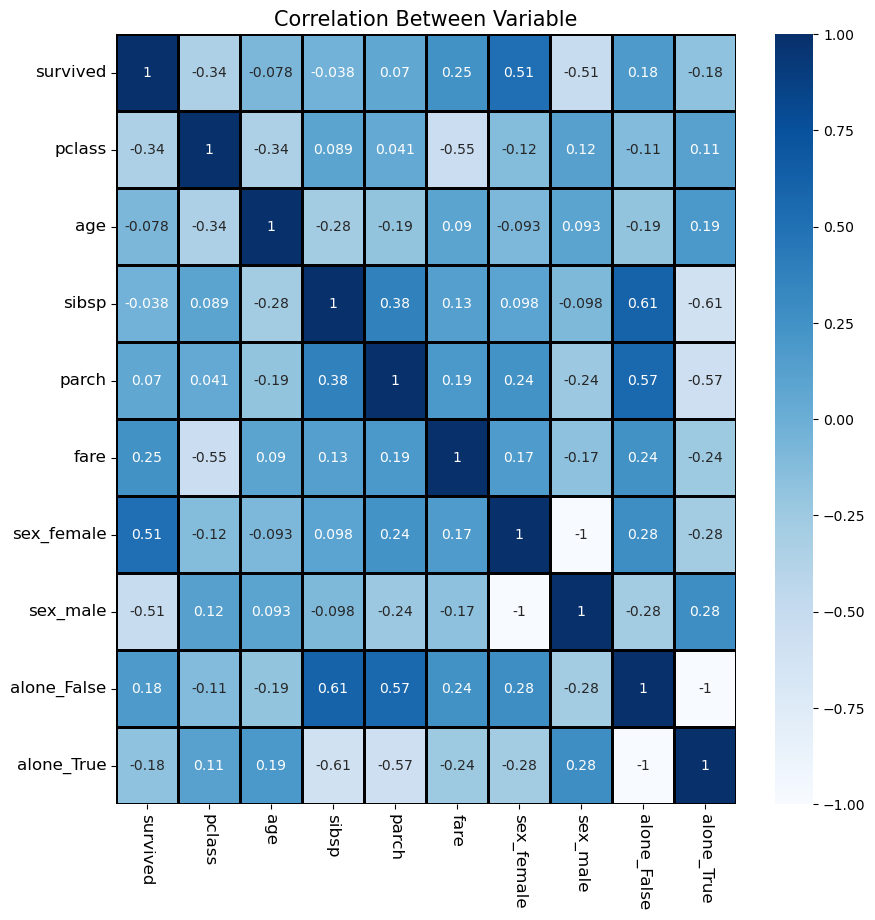

In [60]:
corr=titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True,cmap='Blues',linewidth=1,linecolor='Black')
plt.title("Correlation Between Variable",size=15)
plt.xticks(rotation=-90,size=12)
plt.yticks(rotation=0,size=12)
plt.show()

In [61]:
corr

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,alone_False,alone_True
survived,1.000000,-0.336811,-0.078321,-0.038018,0.069518,0.246927,0.511844,-0.511844,0.175898,-0.175898
pclass,-0.336811,1.000000,-0.338521,0.088784,0.040756,-0.551794,-0.117611,0.117611,-0.110058,0.110058
age,-0.078321,-0.338521,1.000000,-0.280540,-0.187682,0.090248,-0.092608,0.092608,-0.194885,0.194885
sibsp,-0.038018,0.088784,-0.280540,1.000000,0.379961,0.133207,0.098019,-0.098019,0.608190,-0.608190
parch,0.069518,0.040756,-0.187682,0.379961,1.000000,0.190250,0.237349,-0.237349,0.569769,-0.569769
fare,0.246927,-0.551794,0.090248,0.133207,0.190250,1.000000,0.169542,-0.169542,0.244020,-0.244020
sex_female,0.511844,-0.117611,-0.092608,0.098019,0.237349,0.169542,1.000000,-1.000000,0.281129,-0.281129
sex_male,-0.511844,0.117611,0.092608,-0.098019,-0.237349,-0.169542,-1.000000,1.000000,-0.281129,0.281129
alone_False,0.175898,-0.110058,-0.194885,0.608190,0.569769,0.244020,0.281129,-0.281129,1.000000,-1.000000
alone_True,-0.175898,0.110058,0.194885,-0.608190,-0.569769,-0.244020,-0.281129,0.281129,-1.000000,1.000000


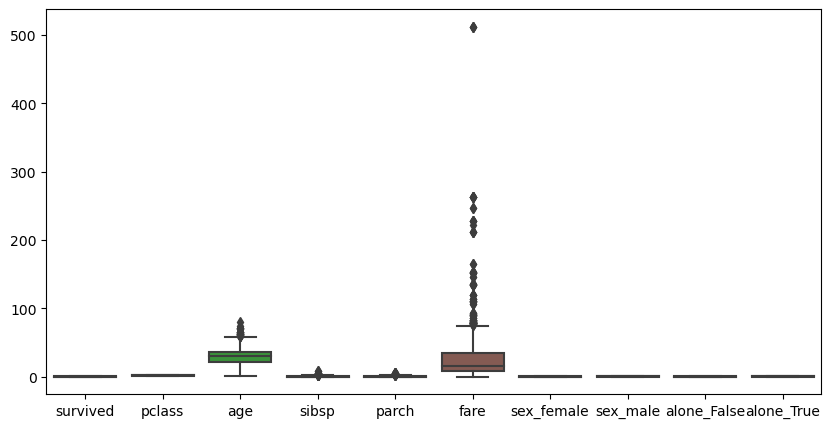

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(data=titanic)
plt.show()

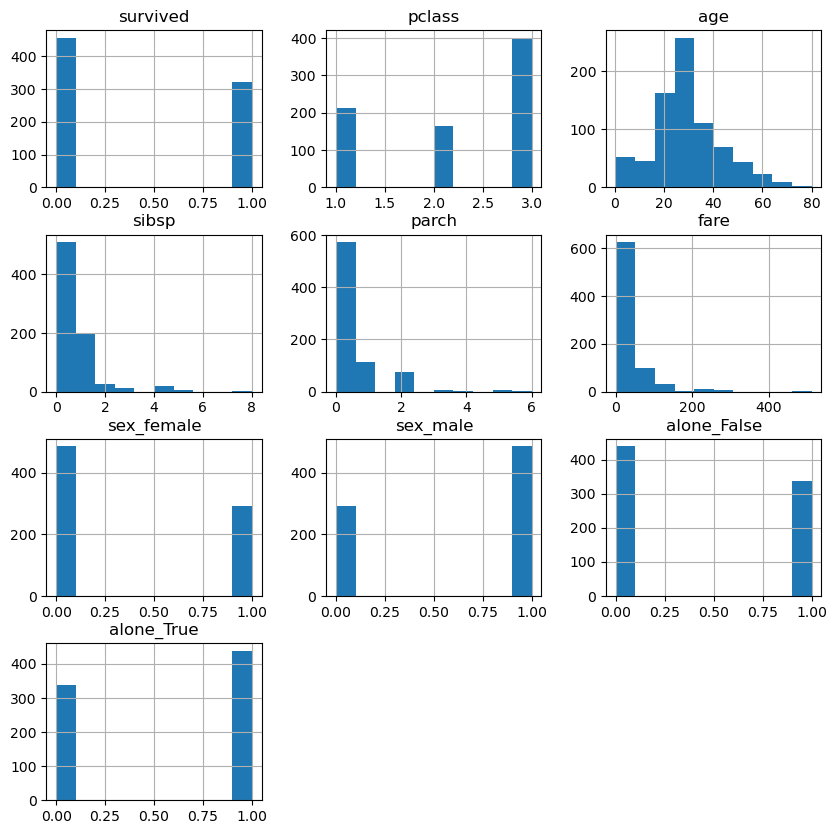

In [63]:
titanic.hist(figsize=(10,10))
plt.show()

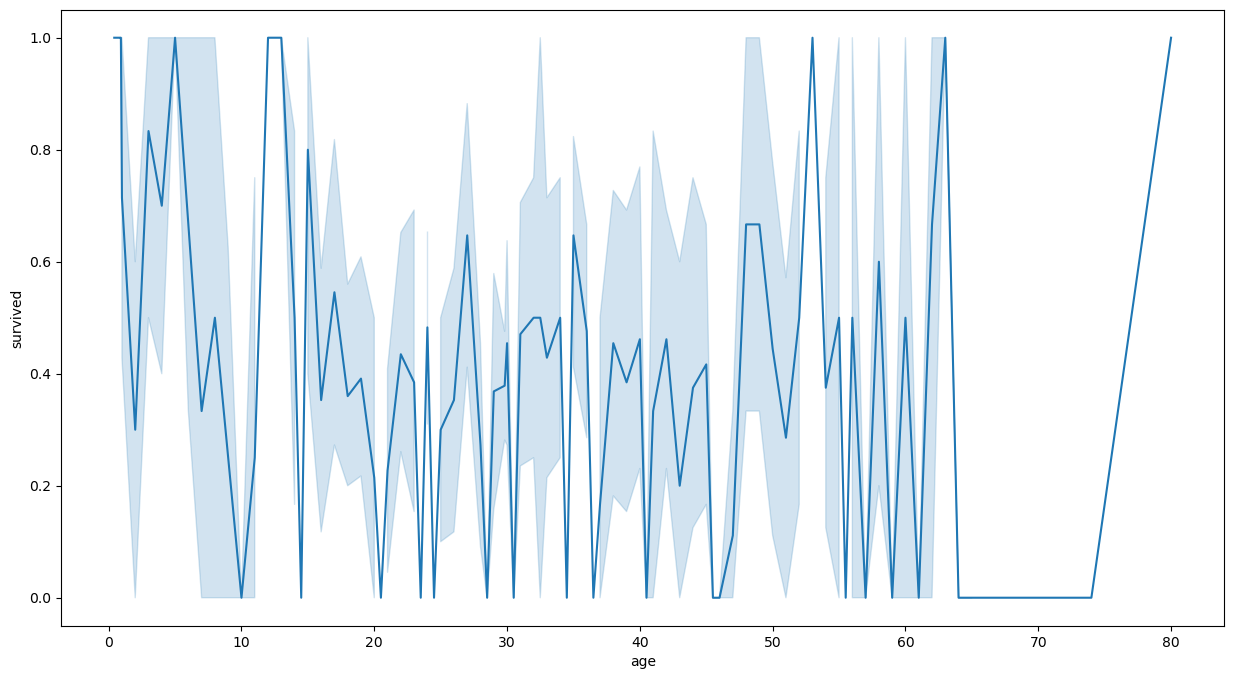

In [64]:
plt.figure(figsize=(15,8))
sns.lineplot(x='age',y='survived',data=titanic)
plt.show()

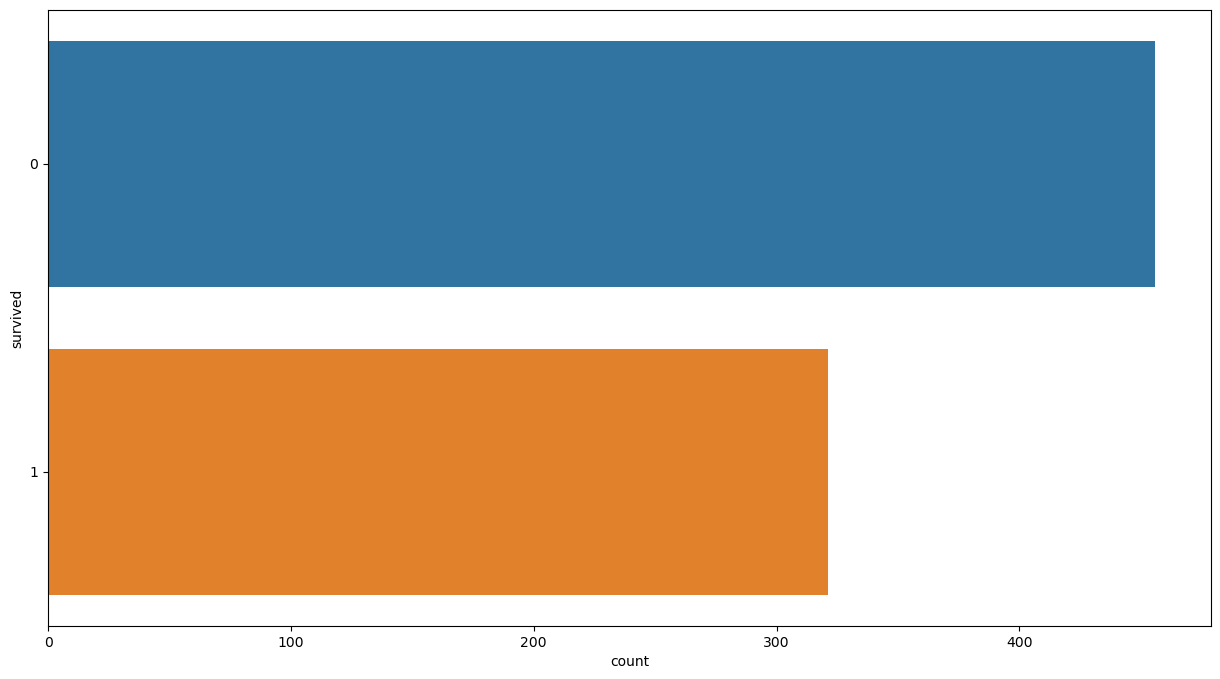

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(y='survived',data=titanic)
plt.show()

## Train & Test Split

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
x=titanic.drop('survived',axis=1)
y=titanic['survived']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier 

In [70]:
dt=DecisionTreeClassifier()

In [71]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction

In [72]:
predictions=dt.predict(x_test)
df1=x_test
df1 =df1.assign(survival=predictions)
print(df1)

     pclass    age  sibsp  parch     fare  sex_female  sex_male  alone_False  \
805       3  31.00      0      0   7.7750           0         1            0   
179       3  36.00      0      0   0.0000           0         1            0   
474       3  22.00      0      0   9.8375           1         0            0   
433       3  17.00      0      0   7.1250           0         1            0   
346       2  40.00      0      0  13.0000           1         0            0   
..      ...    ...    ...    ...      ...         ...       ...          ...   
818       3  43.00      0      0   6.4500           0         1            0   
426       2  28.00      1      0  26.0000           1         0            1   
803       3   0.42      0      1   8.5167           0         1            1   
210       3  24.00      0      0   7.0500           0         1            0   
203       3  45.50      0      0   7.2250           0         1            0   

     alone_True  survival  
805        

In [73]:
x_new_test =np.array([[2,35.000000,0,0,10.5000,0,1,0,1]])
prediction = dt.predict(x_new_test)
print("Prediction: {}".format(prediction))

Prediction: [0]


E:\data\application path\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [91]:
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead
